<a href="https://colab.research.google.com/github/arminwitte/llsi/blob/notebooks/example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import sys
import os

# Install llsi if running in Google Colab
if "google.colab" in sys.modules:
    !pip install llsi


In [8]:
import os
import urllib.request

# Check if data exists locally (repo structure), otherwise download
local_path = "../data/heated_wire_data.npy"
filename = "heated_wire_data.npy"

if os.path.exists(local_path):
    data_path = local_path
    print(f"Using local data from {data_path}")
elif os.path.exists(filename):
    data_path = filename
    print(f"Using existing {filename}")
else:
    print("Downloading data...")
    url = "https://raw.githubusercontent.com/arminwitte/llsi/main/data/heated_wire_data.npy"
    urllib.request.urlretrieve(url, filename)
    data_path = filename


Using local data from ../data/heated_wire_data.npy


In [9]:
import numpy as np

import llsi

d = np.load("../data/heated_wire_data.npy")



In [10]:
t = d[:, 0]
Re = d[:, 1]
Nu = d[:, 2]

In [11]:
data = llsi.SysIdData(t=t, Re=Re, Nu=Nu)
data.equidistant()
data.center()
data.downsample(30)
data, test_set = data.split(0.6)
data.lowpass(1, 10)
data.crop(start=100)
data.center()
test_set.center()

Splitting at 5961


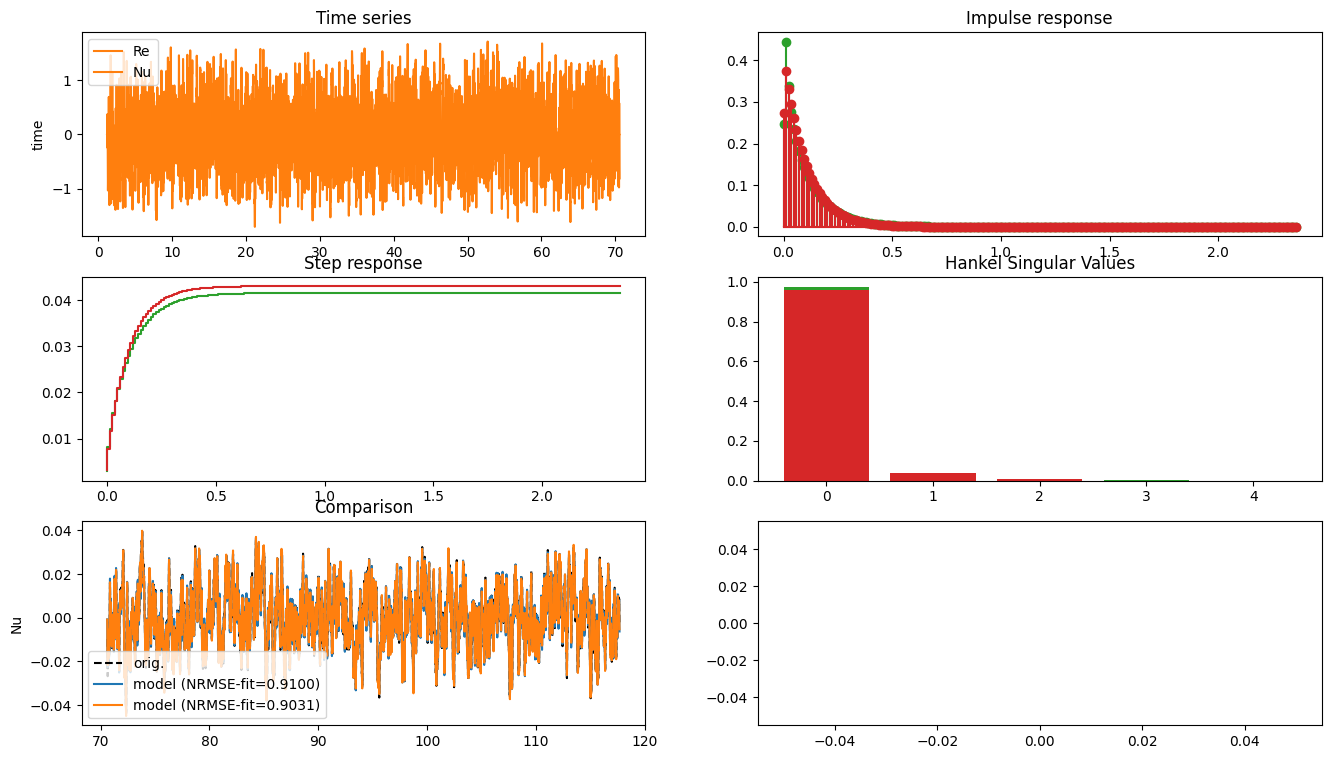

In [14]:
with llsi.Figure() as fig:
    fig.plot(data)
    mod1 = llsi.sysid(data, "Nu", "Re", (2,), method="po-moesp")
    mod2 = llsi.sysid(data, "Nu", "Re", (1,), method="n4sid")
    fig.plot([mod1, mod2], "impulse")
    fig.plot([mod1, mod2], "step")
    fig.plot([mod1, mod2], "hsv")
    fig.plot(
        {"mod": [mod1, mod2], "data": test_set, "y_name": "Nu", "u_name": "Re"},
        "compare",
    )